# Tarea 3


EL7024 - Teoría de Información: Fundamentos y Aplicaciones

Profesor: Jorge Silva
Auxiliar: Sebastián Espinosa

Autor: Martín Cornejo

## Paquetes necesarios

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pdb

## Algoritmo Blahut-Arimoto

In [165]:
def blahut_arimoto(matrizTransicion):
    Iu=1
    Il=0
    error = 0.00001
    N, M = matrizTransicion.shape
    probC = np.ones((M, 1))
    probC[0,0] = 1/3
    probC[1,0] = 2/3
    qy = np.matmul(matrizTransicion, probC)
    F = np.zeros(M)
    while True:
        for idx in range(M):
            temp = 0
            for idy in range(N):
                temp += matrizTransicion[idy, idx]*np.log(matrizTransicion[idy, idx] / qy[idy])[0]
            
            F[idx] = np.exp(temp)
        
        x = np.matmul(F, probC)[0]
        Il = np.log2(x)
        Iu = np.log2(np.amax(F))
        
        if (Iu - Il) < error:
            channel_cap = Il
            print("prob r(x)")
            print(probC)
            return channel_cap            
        else:
            probC = np.multiply(np.reshape(np.multiply(F, 1/x), (2,1)), probC)
            qy = np.matmul(matrizTransicion, probC)

## P1 b)

In [166]:
capacities = []
alphas = np.linspace(0.0001, 0.9999, 100)
for alpha in alphas:
    matrizT = np.transpose(np.array([(1-alpha, alpha/2, alpha/2),(alpha/2, alpha/2, 1 - alpha)]))
    capacities.append(blahut_arimoto(matrizT))

prob r(x)
[[0.49999999]
 [0.50000001]]
prob r(x)
[[0.49999707]
 [0.50000293]]
prob r(x)
[[0.49999885]
 [0.50000115]]
prob r(x)
[[0.49999957]
 [0.50000043]]
prob r(x)
[[0.49999825]
 [0.50000175]]
prob r(x)
[[0.49999936]
 [0.50000064]]
prob r(x)
[[0.49999813]
 [0.50000187]]
prob r(x)
[[0.49999921]
 [0.50000079]]
prob r(x)
[[0.49999806]
 [0.50000194]]
prob r(x)
[[0.49999572]
 [0.50000428]]
prob r(x)
[[0.49999791]
 [0.50000209]]
prob r(x)
[[0.49999569]
 [0.50000431]]
prob r(x)
[[0.49999761]
 [0.50000239]]
prob r(x)
[[0.4999953]
 [0.5000047]]
prob r(x)
[[0.49999709]
 [0.50000291]]
prob r(x)
[[0.49999805]
 [0.50000195]]
prob r(x)
[[0.49999625]
 [0.50000375]]
prob r(x)
[[0.49999726]
 [0.50000274]]
prob r(x)
[[0.4999949]
 [0.5000051]]
prob r(x)
[[0.49999599]
 [0.50000401]]
prob r(x)
[[0.49999665]
 [0.50000335]]
prob r(x)
[[0.49999387]
 [0.50000613]]
prob r(x)
[[0.49999457]
 [0.50000543]]
prob r(x)
[[0.49999496]
 [0.50000504]]
prob r(x)
[[0.49999511]
 [0.50000489]]
prob r(x)
[[0.49999506]
 [0.5

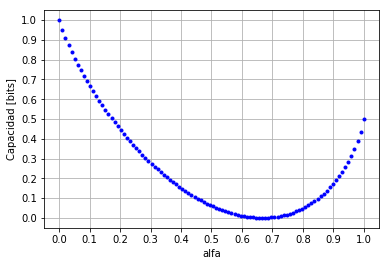

In [167]:
plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.plot(alphas,capacities, 'b.')
plt.xlabel("alfa")
plt.ylabel("Capacidad [bits]")
plt.savefig("capacidad_alfa.pdf")